In [124]:
import numpy as np
import pandas as pd

In [125]:
df=pd.read_csv(R"C:\Users\HP\Downloads\archive\spam.csv",encoding='ISO-8859-1')

In [126]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4218,ham,Anything lor if they all go then i go lor...,NaN,NaN,NaN
2205,ham,"Haha, my legs and neck are killing me and my a...",NaN,NaN,NaN
2820,ham,Oh god..taken the teeth?is it paining,NaN,NaN,NaN
3555,ham,Ok lor. I'm in town now lei.,NaN,NaN,NaN
1679,ham,"Today is \song dedicated day..\"" Which song wi...",NaN,NaN,NaN


In [127]:
df.shape

(5572, 5)

In [128]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# Data cleaning

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [130]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [131]:
df.sample(5)

,v1,v2
5522,ham,Thats cool. I want to please you...
2300,ham,Nothin comes to my mind. ÌÏ help me buy hanger...
4569,spam,Wanna have a laugh? Try CHIT-CHAT on your mobi...
635,ham,Me n him so funny...
487,ham,Dear reached railway. What happen to you


In [132]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
644,ham,Allo! We have braved the buses and taken on th...
4650,spam,A å£400 XMAS REWARD IS WAITING FOR YOU! Our co...
652,ham,"Wait, do you know if wesleys in town? I bet sh..."
3613,ham,Ok c Ì_ then.
2828,spam,Send a logo 2 ur lover - 2 names joined by a h...


In [133]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [134]:
df['target']=encoder.fit_transform(df['target'])

In [135]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [136]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [137]:
# check for duplicate values
df.duplicated().sum()

403

In [138]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [139]:
df.duplicated().sum()

0

In [140]:
df.shape

(5169, 2)

# 2. EDA

In [141]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

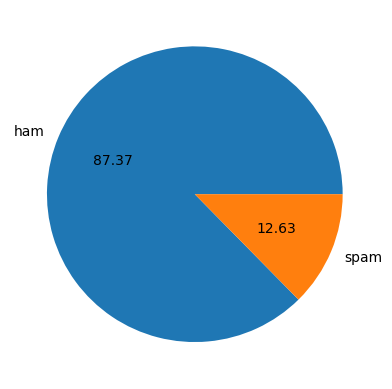

In [143]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [144]:
#data is imbalanced

In [145]:
import nltk 

In [146]:
!pip install nltk

In [147]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [148]:
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [149]:
import nltk 
nltk.download('punkt')
download_dir=('nltk_data')
nltk.data.path.append('nltk_data')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [150]:
# number of words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [151]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [152]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [153]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [154]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [155]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [156]:
#ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [157]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [158]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

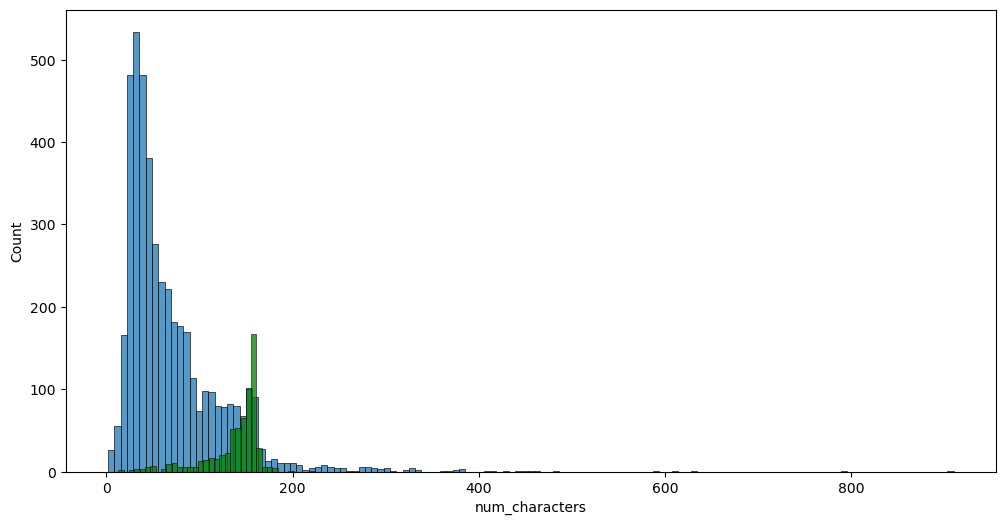

In [159]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='g')

<Axes: xlabel='num_words', ylabel='Count'>

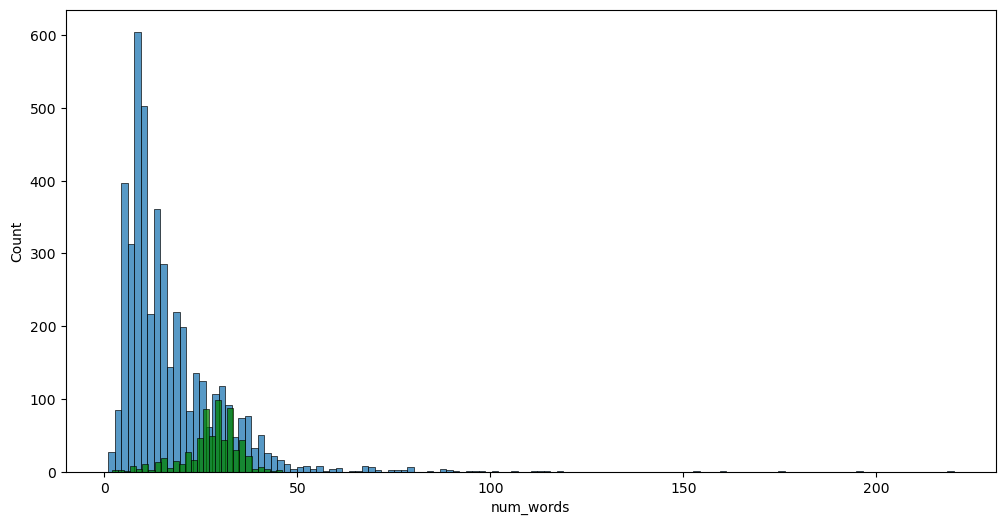

In [160]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='g')

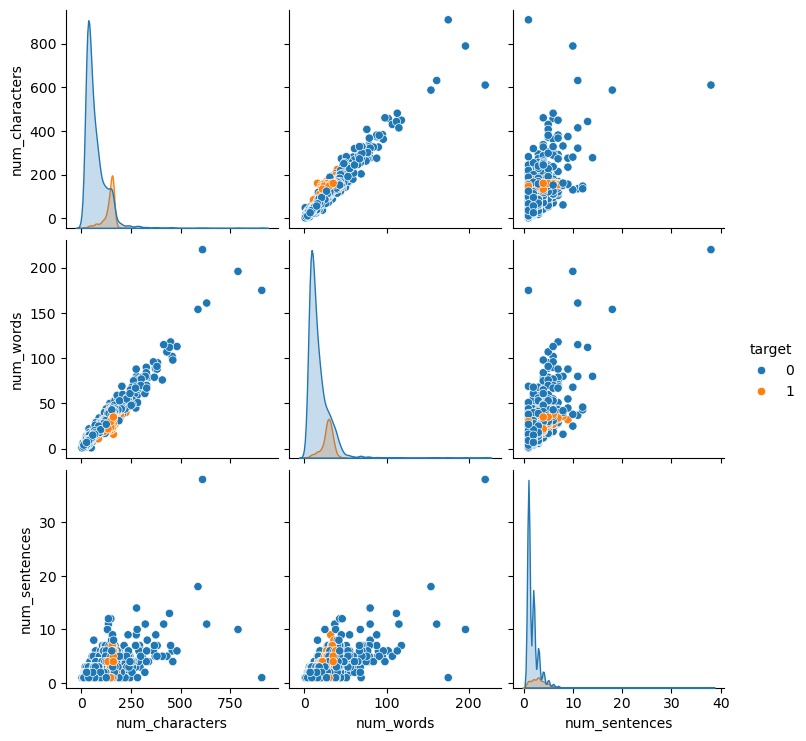

In [161]:
sns.pairplot(df,hue='target')

In [162]:
df_numeric=df.select_dtypes(include=['number'])
correlation_matrix=df_numeric.corr()

<Axes: >

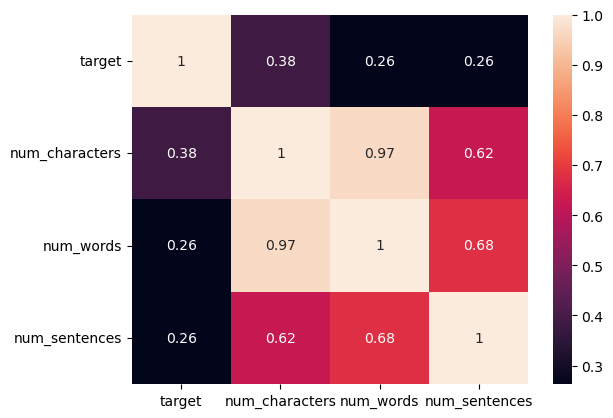

In [163]:
sns.heatmap(df_numeric.corr(),annot=True)

# 3. Data Preprocessing
. Lower case
. Tokenization
. Removing special characters
. Removing stop words and punctuation 
. Stemming

In [164]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
   
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)
        

In [165]:
from nltk.corpus import stopwords
import string

In [166]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [167]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('lover')

'lover'

In [168]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [169]:
df['transformed_text']= df['text'].apply(transform_text)

In [170]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [171]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

In [172]:
!pip install wordcloud

In [173]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [174]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

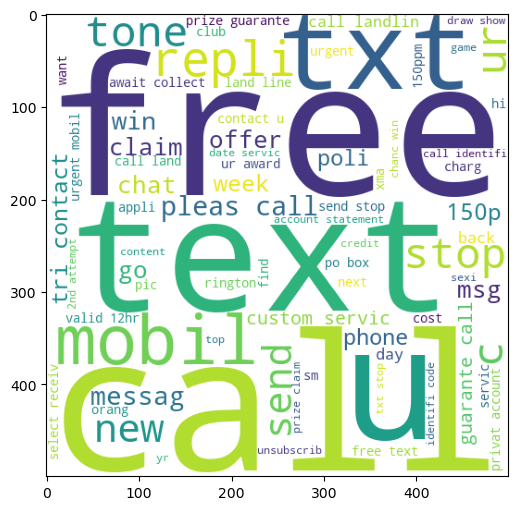

In [175]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [176]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

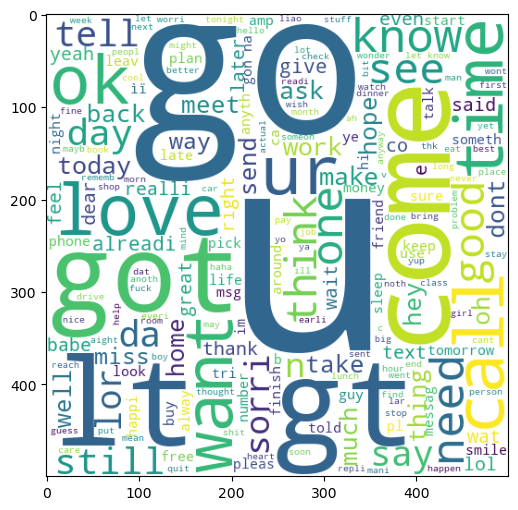

In [177]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [178]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [179]:
df[df['target'] == 1]

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [180]:
df[df['target'] == 0]

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
...,...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1,huh lei
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [181]:
df[df['target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [182]:
df[df['target'] == 0]['transformed_text'].tolist()

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [183]:
# appling loop
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [184]:
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    print(msg)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
u dun say earli hor u c alreadi say
nah think goe usf live around though
even brother like speak treat like aid patent
per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun
gon na home soon want talk stuff anymor tonight k cri enough today
search right word thank breather promis wont take help grant fulfil promis wonder bless time
date sunday
oh k watch
eh u rememb 2 spell name ye v naughti make v wet
fine thatåõ way u feel thatåõ way gota b
serious spell name
go tri 2 month ha ha joke
pay first lar da stock comin
aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi
ffffffffff alright way meet sooner
forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol
lol alway convinc
catch bu fri egg make tea eat mom left dinner feel love
back amp pack car let know room
ahhh work vagu rememb feel like lol
wait stil

In [185]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [186]:
len(spam_corpus)

9939

In [187]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [188]:
len(ham_corpus)

35404

In [189]:
get_ipython().system('pip install collection')
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [190]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [191]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [192]:
get_ipython().system('pip install collection')
from collections import Counter
Counter(ham_corpus)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

In [193]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [194]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


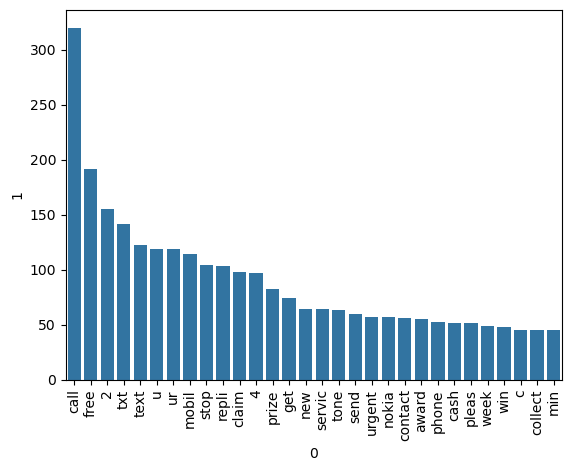

In [195]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

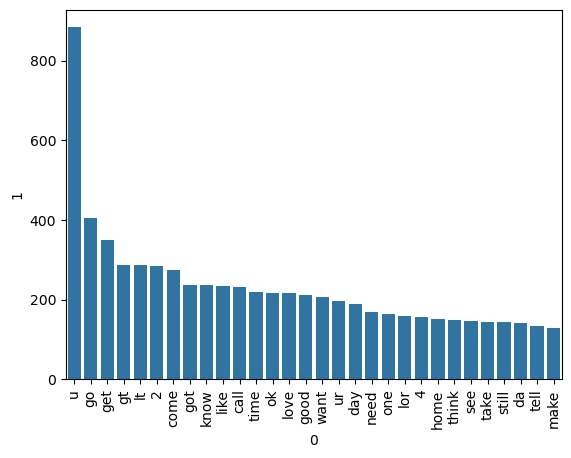

In [196]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [197]:
#Text Vectorization
#using Bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [199]:
import sklearn
print(sklearn.__version__)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

1.5.1


In [200]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [201]:
#from sklearn.preproccessing import MinMaxScaler
#scaler = MinMaxScaler()
#X=scaler.fit_transform(X)

In [202]:
#appending the num_character col to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [203]:
X

array([[  0.,   0.,   0., ...,   0.,   0., 111.],
       [  0.,   0.,   0., ...,   0.,   0.,  29.],
       [  0.,   0.,   0., ...,   0.,   0., 155.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  57.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [204]:
X.shape

(5169, 3001)

In [205]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [206]:
Y=df['target'].values

In [207]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [210]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [211]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [212]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [213]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [214]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [215]:
# tfidf---> MNB

In [216]:
!pip install xgboost

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [218]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [219]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [220]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [221]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.971953578336557, 0.943089430894309)

In [222]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.943089430894309
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9448742746615088
Precision -  0.8857142857142857
For  LR
Accuracy -  0.965183752417795
Precision -  0.9553571428571429
For  RF
Accuracy -  0.9690522243713733
Precision -  0.9818181818181818


C:\Users\HP\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.8992248062015504
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9495798319327731


In [223]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [224]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.969052,0.981818
1,KN,0.905222,0.976190
8,ETC,0.978723,0.975410
4,LR,0.965184,0.955357
10,xgb,0.970019,0.949580
2,NB,0.978723,0.946154
0,SVC,0.971954,0.943089
6,AdaBoost,0.964217,0.931624
9,GBDT,0.950677,0.930693
7,BgC,0.966151,0.899225


In [225]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [226]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.969052
1,KN,Accuracy,0.905222
2,ETC,Accuracy,0.978723
3,LR,Accuracy,0.965184
4,xgb,Accuracy,0.970019
5,NB,Accuracy,0.978723
6,SVC,Accuracy,0.971954
7,AdaBoost,Accuracy,0.964217
8,GBDT,Accuracy,0.950677
9,BgC,Accuracy,0.966151


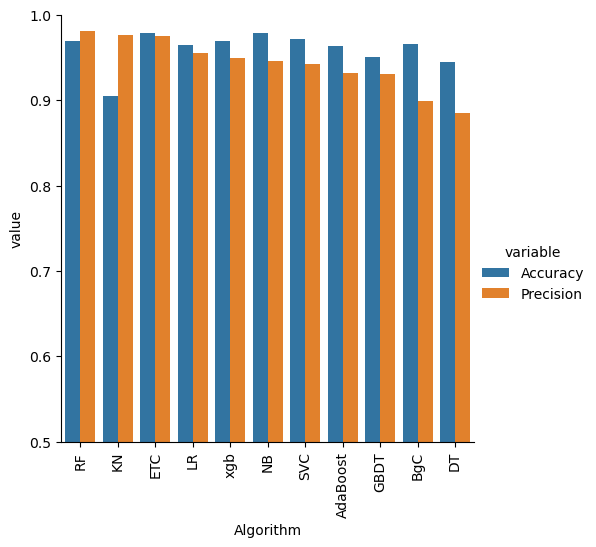

In [227]:
sns.catplot(x = 'Algorithm', y='value', 
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [228]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [229]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [230]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,RF,0.969052,0.981818,0.969052,0.981818
1,KN,0.905222,0.976190,0.905222,0.976190
2,ETC,0.978723,0.975410,0.978723,0.975410
3,LR,0.965184,0.955357,0.965184,0.955357
4,xgb,0.970019,0.949580,0.970019,0.949580
5,NB,0.978723,0.946154,0.978723,0.946154
6,SVC,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.964217,0.931624,0.964217,0.931624
8,GBDT,0.950677,0.930693,0.950677,0.930693
9,BgC,0.966151,0.899225,0.966151,0.899225


In [231]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [232]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [233]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [234]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,RF,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
3,LR,0.965184,0.955357,0.965184,0.955357,0.965184,0.955357
4,xgb,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580
5,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
6,SVC,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
8,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
9,BgC,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225


In [235]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [236]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818,0.969052,0.981818
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
3,LR,0.965184,0.955357,0.965184,0.955357,0.965184,0.955357,0.965184,0.955357
4,xgb,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580
5,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
6,SVC,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
8,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
9,BgC,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225,0.966151,0.899225


In [237]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [238]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [239]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [240]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [241]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [242]:
from sklearn.ensemble import StackingClassifier

In [243]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [244]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [245]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))